In [1]:
#install Kaggle
!pip install -q kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"moudipa56","key":"3225efc1867a78c033bd322f0123bde4"}'}

In [3]:
#create a kaggle folder
! mkdir ~/.kaggle

In [4]:
#copy the kaggle.json to folder created
! cp kaggle.json ~/.kaggle/

In [5]:
#permison for the json to act
! chmod 600 ~/.kaggle/kaggle.json

In [6]:
#to list all datasets in kaggle
! kaggle datasets list

ref                                                         title                                              size  lastUpdated          downloadCount  
----------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  
gpreda/reddit-vaccine-myths                                 Reddit Vaccine Myths                              237KB  2021-12-03 07:25:55          17598  
crowww/a-large-scale-fish-dataset                           A Large Scale Fish Dataset                          3GB  2021-04-28 17:03:01          10497  
imsparsh/musicnet-dataset                                   MusicNet Dataset                                   22GB  2021-02-18 14:12:19           5172  
dhruvildave/wikibooks-dataset                               Wikibooks Dataset                                   2GB  2021-10-22 10:48:21           3796  
promptcloud/careerbuilder-job-listing-2020                  Careerbuilder Jo

In [7]:
!kaggle datasets download -d tongpython/cat-and-dog

 95% 207M/218M [00:01<00:00, 167MB/s]
100% 218M/218M [00:01<00:00, 165MB/s]


In [8]:
!unzip cat-and-dog.zip

Streaming output truncated to the last 5000 lines.
  inflating: training_set/training_set/cats/cat.3704.jpg  
  inflating: training_set/training_set/cats/cat.3705.jpg  
  inflating: training_set/training_set/cats/cat.3706.jpg  
  inflating: training_set/training_set/cats/cat.3707.jpg  
  inflating: training_set/training_set/cats/cat.3708.jpg  
  inflating: training_set/training_set/cats/cat.3709.jpg  
  inflating: training_set/training_set/cats/cat.371.jpg  
  inflating: training_set/training_set/cats/cat.3710.jpg  
  inflating: training_set/training_set/cats/cat.3711.jpg  
  inflating: training_set/training_set/cats/cat.3712.jpg  
  inflating: training_set/training_set/cats/cat.3713.jpg  
  inflating: training_set/training_set/cats/cat.3714.jpg  
  inflating: training_set/training_set/cats/cat.3715.jpg  
  inflating: training_set/training_set/cats/cat.3716.jpg  
  inflating: training_set/training_set/cats/cat.3717.jpg  
  inflating: training_set/training_set/cats/cat.3718.jpg  
  infl

In [9]:
import numpy as np
import pandas as pd
import os
import tensorflow as tf
import matplotlib.pyplot as plt
import keras
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, Conv2DTranspose
from keras.models import Model
from keras.preprocessing import image

In [19]:
cat_train_path = "/content/training_set/training_set/cats/" 
cat_test_path = "/content/test_set/test_set/cats/"

cat_train = []
for filename in os.listdir(cat_train_path):
    if filename.endswith(".jpg"):
        img = image.load_img(cat_train_path + filename, target_size=(128, 128))
        cat_train.append(image.img_to_array(img))
cat_train = np.array(cat_train)

cat_test = []
for filename in os.listdir(cat_test_path):
    if filename.endswith(".jpg"):
        img = image.load_img(cat_test_path+filename, target_size=(128, 128))
        cat_test.append(image.img_to_array(img))
cat_test = np.array(cat_test)

In [20]:
print("cat_train", cat_train.shape)
print("cat_test", cat_test.shape)

cat_train (4000, 128, 128, 3)
cat_test (1011, 128, 128, 3)


In [21]:
def show_cat_data(X, n=10, title=""):
    plt.figure(figsize=(15, 5))
    for i in range(n):
        ax = plt.subplot(2,n,i+1)
        plt.imshow(image.array_to_img(X[i]))
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.suptitle(title, fontsize = 20)

In [22]:
def noisy(image):
  row,col,ch= image.shape
  mean = 50
  var = 1024
  sigma = var**0.5
  gauss = np.random.normal(mean,sigma,(row,col,ch))
  gauss = gauss.reshape(row,col,ch)
  noisy = image + gauss
  return noisy

In [23]:
cat_train_noisy = []
for img in cat_train:
    noisy_img = noisy(img)
    cat_train_noisy.append(noisy_img)
cat_train_noisy = np.array(cat_train_noisy)
print(cat_train_noisy.shape)

(4000, 128, 128, 3)


In [24]:
cat_test_noisy = []
for img in cat_test:
    noisy_img = noisy(img)
    cat_test_noisy.append(noisy_img)
cat_test_noisy = np.array(cat_test_noisy)
print(cat_test_noisy.shape)

(1011, 128, 128, 3)


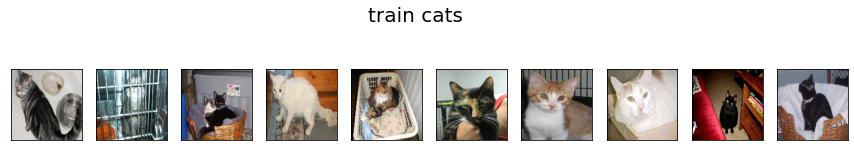

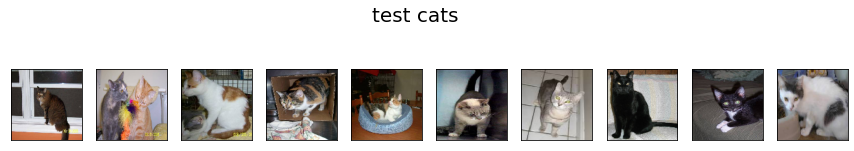

In [25]:
show_cat_data(cat_train, title="train cats")
show_cat_data(cat_test, title="test cats")

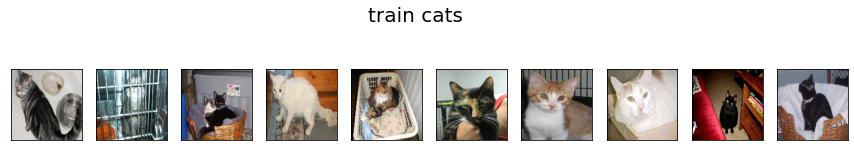

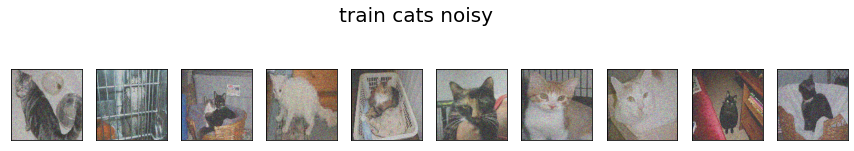

In [26]:
show_cat_data(cat_train, title="train cats")
show_cat_data(cat_train_noisy, title="train cats noisy")

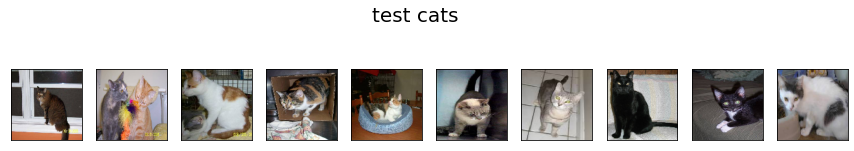

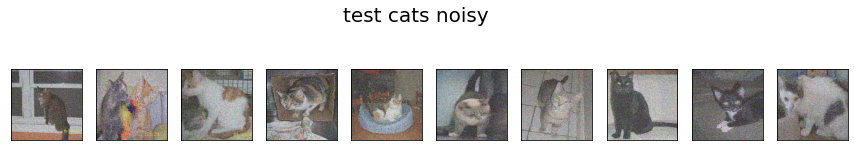

In [27]:
show_cat_data(cat_test, title="test cats")
show_cat_data(cat_test_noisy, title="test cats noisy")

In [28]:
input_layer = Input(shape=(128, 128, 3), name="INPUT")
x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_layer)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)

code_layer = MaxPooling2D((2, 2), name="CODE")(x)

x = Conv2DTranspose(8, (3, 3), activation='relu', padding='same')(code_layer)
x = UpSampling2D((2, 2))(x)
x = Conv2DTranspose(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2DTranspose(16, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2,2))(x)
output_layer = Conv2D(3, (3, 3), padding='same', name="OUTPUT")(x)

In [33]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)

In [34]:
cat_AE = Model(input_layer, output_layer)
cat_AE.compile(optimizer=optimizer, loss='mse',metrics="accuracy")
cat_AE.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 INPUT (InputLayer)          [(None, 128, 128, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 128, 128, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 8)         1160      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 8)        0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 8)         584 

In [35]:
history=cat_AE.fit(cat_train, cat_train,
                epochs=30,
                batch_size=32,
                shuffle=True,
                validation_data=(cat_test, cat_test))


Epoch 1/30
125/125 [==============================] - 132s 1s/step - loss: 7909.2466 - accuracy: 0.4917 - val_loss: 1953.1721 - val_accuracy: 0.6252
Epoch 2/30
125/125 [==============================] - 131s 1s/step - loss: 1469.4470 - accuracy: 0.6126 - val_loss: 1191.2385 - val_accuracy: 0.6058
Epoch 3/30
125/125 [==============================] - 131s 1s/step - loss: 1090.0125 - accuracy: 0.6272 - val_loss: 1067.7786 - val_accuracy: 0.6014
Epoch 4/30
125/125 [==============================] - 131s 1s/step - loss: 986.4671 - accuracy: 0.6367 - val_loss: 952.0345 - val_accuracy: 0.6343
Epoch 5/30
125/125 [==============================] - 131s 1s/step - loss: 914.5460 - accuracy: 0.6524 - val_loss: 914.1484 - val_accuracy: 0.6645
Epoch 6/30
125/125 [==============================] - 131s 1s/step - loss: 901.4246 - accuracy: 0.6511 - val_loss: 906.5202 - val_accuracy: 0.6722
Epoch 7/30
125/125 [==============================] - 131s 1s/step - loss: 880.0268 - accuracy: 0.6638 - val_los

In [36]:
cat_AE.save("cat_AE.h5")

In [37]:
get_encoded_cat = Model(inputs=cat_AE.input, outputs=cat_AE.get_layer("CODE").output)

In [38]:
encoded_cat = get_encoded_cat.predict(cat_test)
encoded_cat = encoded_cat.reshape((len(cat_test), 16*16*8))
encoded_cat.shape

(1011, 2048)

In [39]:
reconstructed_cats = cat_AE.predict(cat_test_noisy)

In [40]:
print("Test Accuracy: {:.2f}%".format(cat_AE.evaluate(np.array(cat_test_noisy),np.array(cat_test))[1]*100))

32/32 [==============================] - 12s 373ms/step - loss: 3018.0310 - accuracy: 0.6711
Test Accuracy: 67.11%


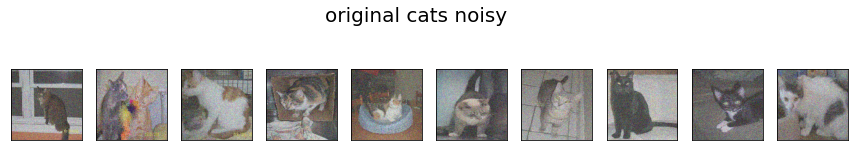

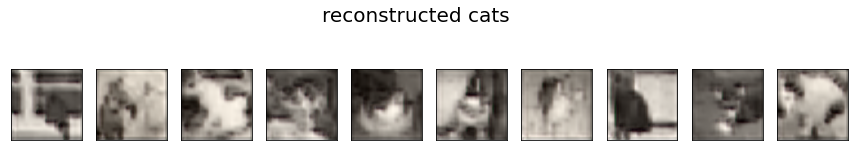

In [41]:
show_cat_data(cat_test_noisy, title="original cats noisy")
show_cat_data(reconstructed_cats, title="reconstructed cats")

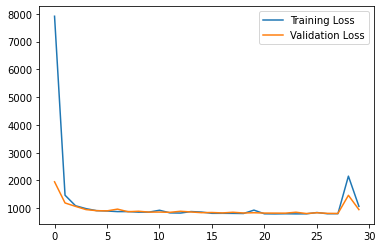

In [42]:
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.legend()

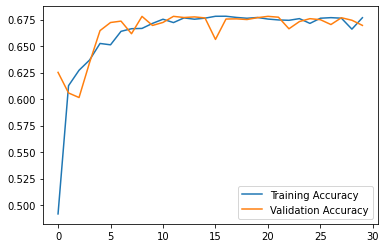

In [43]:
plt.plot(history.history["accuracy"], label="Training Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.legend()